 # Cdiscount’s Image Classification Challenge

<h1>1.Business/Real-world Problem</h1>

<h2> 1.2. Problem Statement </h2>

kaggle has begun a competiton    Cdiscount’s Image Classification Challenge

Cdiscount.com generated nearly 3 billion euros last year, making it France’s largest non-food e-commerce company. While the company already sells everything from TVs to trampolines, the list of products is still rapidly growing. By the end of this year, Cdiscount.com will have over 30 million products up for sale. This is up from 10 million products only 2 years ago. Ensuring that so many products are well classified is a challenging task.
Currently, Cdiscount.com applies machine learning algorithms to the text description of the products in order to automatically predict their category. As these methods now seem close to their maximum potential, Cdiscount.com believes that the next quantitative improvement will be driven by the application of data science techniques to images.
In this challenge, we are required to build a model that automatically classifies the products based on their images. As a quick tour of Cdiscount.com's website can confirm, one product can have one or several images. The data set Cdiscount.com is making available is unique and characterized by superlative numbers in several ways:

* Almost 9 million products: half of the current catalogue
* More than 15 million images at 180x180 resolution
* More than 5000 categories: yes this is quite an extreme multi-class classification!


<h2>1.3 Source/Useful Links </h2>


<b> Competition Page: </b> https://www.kaggle.com/competitions/cdiscount-image-classification-challenge/overview
</p>

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

##The datasets consists of -
####BSON Files

BSON, short for Bin­ary JSON, is a bin­ary-en­coded seri­al­iz­a­tion of JSON-like doc­u­ments, used with MongoDB. 

####File Descriptions
* Please Note: The train and test files are very large!

train.bson - (Size: 58.2 GB) Contains a list of 7,069,896 dictionaries, one per product. Each dictionary contains a product id (key: _id), the category id of the product (key: category_id), and between 1-4 images, stored in a list (key: imgs). Each image list contains a single dictionary per image, which uses the format: {'picture': b'...binary string...'}. The binary string corresponds to a binary representation of the image in JPEG format. This kernel provides an example of how to process the data.

2. train_example.bson - Contains the first 100 records of train.bson so you can start exploring the data before downloading the entire set.

3. test.bson - (Size: 14.5 GB) Contains a list of 1,768,182 products in the same format as train.bson, except there is no category_id included. The objective of the competition is to predict the correct category_id from the picture(s) of each product id (_id). The category_ids that are present in Private Test split are also all present in the Public Test split.

4. category_names.csv - Shows the hierarchy of product classification. Each category_id has a corresponding level1, level2, and level3 name, in French. The category_id corresponds to the category tree down to its lowest level. This hierarchical data may be useful, but it is not necessary for building models and making predictions. All the absolutely necessary information is found in train.bson.

5. sample_submission.csv - Shows the correct format for submission. It is highly recommended that you zip your submission file before uploading for scoring.


<h3>2.1.2. Example Data Point

data point contains dictionaries, one per product. Each dictionary contains :

* product id (key: _id)
* the category id of the product (key: category_id),
* 1-4 images, stored in a list (key: imgs).
</h3>
<pre>{'_id': 0, 'imgs': [{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00\xb4\x00\xb4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf1\xf2\xf3\xf4\xf5\xf6\xf7\xf8\xf9\xfa\xff\xc4\x00\x1f\x01\x00\x03\x01\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x11\x00\x02\x01\x02\x04\x04\x03\x04\x07\x05\x04\x04\x00\x01\x02w\x00\x01\x02\x03\x11\x04\x05!1\x06\x12AQ\x07aq\x13"2\x81\x08\x14B\x91\xa1\xb1\xc1\t#3R\xf0\x15br\xd1\n\x16$4\xe1%\xf1\x17\x18\x19\x1a&\'()*56789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x82\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf2\xf3\xf4\xf5\xf6\xf7\xf8\xf9\xfa\xff\xda\x00\x0c\x03\x01\x00\x02\x11\x03\x11\x00?\x00\xf7\xfa(\xa2\x80\n(\xa2\x80\n(\xac\xfd{Pm\'\xc3\xfa\x8e\xa2\xab\xb9\xadm\xa4\x98/\xa9U$\x0f\xd2\x809\xdf\x13\xfc@\x83E\xd5\x17E\xd2\xf4\xf9\xf5\x9dm\x93y\xb4\xb7`\x04K\xfd\xe9\x1c\xf0\xa3\xf5\xac\xa1\xe2\xff\x00\x1f\xe3\xfeD\xcd;\xff\x00\x06\xeb\xff\x00\xc4\xd6\x1e\x83%\x9f\x83\xfe\x1d\xcb\xe2\x8d@\x9b\x8b\xdb\xd8V\xfe\xf2l|\xf3\xc9&\n\xa6}2\xc0\x0f\xc4\xd7\x9dK\xe3?\x1aj\xae\xba\x84\xbe"\x8fE\xb5\x9f&\x08c\x8c\x90@88UVb\x01\xe3q\xef\x9cP=:\x9e\xc5\xff\x00\tw\x8f\xff\x00\xe8L\xd3\xbf\xf0p\xbf\xfcM\x03\xc5\xbf\x10\x0f\xfc\xc9zw\xfe\x0e\x17\xff\x00\x89\xaf\r\xbe\xf1\x7f\x8e\xb4\xf7\x8f\x7f\x8a.$\x8aU\xdd\x14\xd1\x15d\x90\x03\x83\x83\x8e\xa0\xf0A\xc1\x15\x7f\xc3\xbf\x16\xbcE\xa4\xea\x10\xb6\xafzu=8\xb7\xef\xd6D_1T\xff\x00\x12\xb0\x1d\xba\xe0\xd0=\x0fd\xff\x00\x84\xb3\xe2\x07\xfd\tzw\xfe\x0e\x17\xff\x00\x89\xa3\xfe\x12\xcf\x88\x1f\xf4%\xe9\xdf\xf88_\xfe&\xbaX$\x8e\xe6\xde9\xe1p\xf1J\x81\xd1\xc7FR2\x0f\xe5O+S\'b\xd4\x11\xcb\x7f\xc2[\xf1\x03\xfe\x84\xbd;\xff\x00\x06\xeb\xff\x00\xc4\xd1\xff\x00\tw\x8f\xff\x00\xe8K\xd3\xbf\xf0n\xbf\xfcMt\xe5i\xa5k\x9eu\xa4\xb65Tbs?\xf0\x97\xf8\xfb\xfe\x84\xcd?\xff\x00\x06\xeb\xff\x00\xc4\xd4r|B\xf1N\x95\x8b\x9dk\xc1dX/\xfa\xd9t\xfb\xd5\xb8x\xc7\xf7\xb6`dWNV\x9aV\xb0\xfa\xd4\xd3\xd8\xaf\xab\xc1\x9a\xfa6\xb5\xa7\xf8\x83J\x83S\xd3.R\xe2\xd2u\xdc\x8e\xbf\xa8#\xb1\x1d\xc1\xab\xf5\xe6^\x1a\xb4o\r|M\x9bN\xb1\x02=+X\xb3\x92\xf0\xdb\xaf\x0b\x1c\xf1\xb2\xab2\x8e\xdb\x83\x0c\xd7\xa6\xd7|$\xa7\x15$r\xca<\xae\xcc(\xa2\x8a\xa2B\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\xb0\xbck\xff\x00"6\xbd\xff\x00`\xf9\xff\x00\xf4\x03[\xb5\x85\xe3_\xf9\x11\xb5\xef\xfb\x07\xcf\xff\x00\xa0\x1a\x00\xf1\xaf\x145\xd5\xe7\xc0\x9bV6\xc5!\xb7\x86\xcb\xe6\xef\x80\x14\x16\xfar9\xf7\xaf>[;\xadB\xce\xda\xea\xc9$\xba\x8cB\x90\xc8\xb1.\xf6\x85\x97#iQ\xc8\x07\xa8=\x0e}k\xd9\xfc,n/l\xf4M2\xfe\xde&\xd3\xa7\xd0\xe3\x057nY\x14\xa2\x03\xbb\xd0\xf4\xfaW)\x17\xc1+mJY\xae\xf4/\x12Mkg\xe6\xba$s[ot\xc1\xc1\x1b\x83\x0c\x8a\xca\x9dNm:\xea\x0eJOk\x1ey\xaa\xa3X\xda\xdaZ\xdc\x1f\xf4\x813O%\xbf\x19\x88\x10\x00\r\xe8\xcd\x8c\xe3\xb0\x03=j?\x13\xea\xf6\xda\xb3C%\xbc/\x18\x8a\xdf\xcbvuU.\x7f\xe0<W\xa4\x0f\xd9\xf6\xef\xfe\x86\xb4\xff\x00\xc0\x0f\xfe\xce\xb6\xbc5\xf06\xcbJ\xd5b\xbd\xd5\xf5f\xd5\x16\x16\x0f\x1d\xb8\x83\xcaB\xc3\xa6\xeeNG\xb5j\t\x1d\xd7\x84-f\xb4\xf0f\x89op\x08\x9a;\x18U\xc1\xeb\x9d\xa2\xb6\xf6\x1fJ\x93o4\xecT\xc8\xd9h@c8\xa6\xf9d\xd5\x9d\xb4\x85k\x9aQ\xb9\xa2\x91P\xa50\xad\\d\x06\xa1e\xc5s\xca\x06\x8aG6\x06>)\xe8\x7f\xf6\x0b\xbc\xff\x00\xd0\xe1\xae\xfa\xb86\x18\xf8\xa9\xa1\x7f\xd8.\xf7\xff\x00C\x86\xbb\xca\xee\xa2\xadM\x1c\xb5u\x9b\n(\xa2\xb53\n(\xa2\x80\n(\xa2\x80\n(\xa2\x80\n(\xa2\x80\n\xc2\xf1\xaf\xfc\x88\xda\xf7\xfd\x83\xe7\xff\x00\xd0\rn\xd6\x17\x8d\x7f\xe4F\xd7\xbf\xec\x1f?\xfe\x80h\x03\x83\xf0D\xff\x00i\xf0\x8e\x8c\x88\xa8.\xed\xac\xd1\x15\xc9\xe4\x82\xa3\x8f\xa61\xf9\n\xebl\xaf\xe3\xb5\xba]9\xad\xde4\x08\\:/\xc8\xa79`}\xf2I\xaf1\xd2\xaf\x9a\xdb\xc0\xdaI\x80\xc9\r\xdcv\xf1\xb1h\xcf\x12\xa1Q\xc1\xef[^\x06\xd4e\xd4o\xee\x13SL\xe2&ky%|\x186\xe3\x00z\x13\x9f\xaf\x15\xc5K\x14\x9b\xf6ik\xdc\xea\x9c\'Q\xb9S\x85\xa3\xbd\xfa\x1dn\x93\xe2\x84\xbe\xd5&\xd3n"\xf2\xee\x16v\x8d\n\xf2\xa4\x01\x91\xf8\xd7I\x8a\xf3]&\x0b\xb9|h\xba\x84v\xc9q1\x06Y"G\x11\xa88\n[\x9f\xaf\x03\xd6\xba!\xae\xea\x03\xc6\xbfcUW\xd3\xe4\xb5\xf3\x11N\x15\xb2\x08\x07\x1f\xed\x03\xbb+\xedJ\x85w\xc9y\xeb\xad\x8e~I\xc2\\\x92\xd5\x9dHZ6\xd4Q\xde\xda\xca\xe5\x16t\xde:\xa18#\xf04\xc9\xef\xe2\x82\xee;V?\xbd\x91IQ\xfe~\x95\xd1*\xb0\xb5\xeej\xa3+\xda\xc5\x8c\x1aLUm7PMB\xd9\xa5\x0b\xb7k`\xfaR\xdaj\x16\xf7\xf7\x17\x11\xdb:\xca\x90\x10\x8f"\x9c\x8d\xfdv\x8f\xa0\xfeu\x9cg\x19\xc5J;1\xb8\xca-\xa6\xb6\'"\xa3|b\xa7"\xa1a\x83S!\xc4\xe6%\x18\xf8\xa9\xa1\x7f\xd8.\xf7\xff\x00C\x86\xbb\xaa\xe1\xa6\xff\x00\x92\xa9\xa1\x7f\xd8.\xf7\xff\x00C\x86\xbb\x9a\xe8\xa5\xf0#\x1a\x9f\x13\n(\xa2\xb4 (\xa2\x8a\x00(\xa2\x8a\x00(\xa2\x8a\x00(\xa2\x8a\x00+\x0b\xc6\xbf\xf2"\xeb\xdf\xf6\x0f\x9f\xff\x00@5\xbbX^5\xff\x00\x91\x17^\xff\x00\xb0|\xff\x00\xfa\x01\xa0\x0f\x18\xd3-\xae/t\x8d\x0e\x0bv\xf9\xda\xd2\x15\xda\xc7\x00\x8d\x83\xf9W\xa1\xf8cM\xb6\xd0\xed\'\x8a}\xb71\xdc\xfc\xd3\x16L2\xa8\xe0|\xbd\xd4s\x9cr:\xf4\xe9\xe7\x1a|\x97\xda~\x89\xa0\xea\x11\xac>Z\xdbF\x7fx\xa4\xee\x021\xc8\x19\xf5=kB]GU\xd6\xe0\x8aK\xb3\xb6\x14\x93q\x95\x17k\x80{\x0f@+\xc8\xc3\xca\x9d8\xb9K\xe2\xbb>\x97\x1d\x1a\xf50\xca\x14~\x14\x96\x9egQt48...lu\x1b\x95+\xb7\x06\xdeV\x8d\xe3\x00\x1c\xa0\xcf\xde\x07\xa8\xceFT\x03\xd4W<<C|5\t\xad\xeeg\x86\xfa\xde\xe0n/2m\x95v\xfd\xd6\x0c\xb8\xf9\xb9\xebX\xd7\x92\\\x16\xf2 G\xf2\xd78rI\x1f\\\xe0f\xa8\xe9\xd63\xcb\xa8\xa8\xe3;J\x86`I\\\xe3\xa7\xe5X:\xf5&\x9a\xd1-O\x9fX\x0c}d\xeb\xa4\xd7/\xc9\x9d\xbd\xbf\x89 \xbc?d\xd5\xe13\xc6\x06\x12\xe1\x0e%O\xf8\x17\x7f\xc6\xa9\xd9\xdd\xea\x03Y\x99R\xe1\xe6\xb7\xb5\x07m\xcc\xa7\n\xab\x83\xb7$\xfdzR\xcf\xa2Eej&\xf3K\x95P\x1b\x1c\x02\xdd\xcdY\xb9\xd3n\xed\x98Ei\xbaI\x15Vh\x99\xa1\xde\x9b\x88\xc8\xca\x1e\x0e3Y\xc6\x12\xb2Z\xbf\xcc\xed\xa1\x8b\xad\x83\x82U\xa2\xa5\x19+]t\xff\x00\x83\xfdjiK\xa9\xddK\xa5\x8d7LI#\xb4\t\xb5\xe6\xdawK\x9e\xa7>\xfc\xd58#\xbe\xd34\xf9-\xac\xa7{x\x98\xe5\x82\x1c\x1c\xfdz\xd4:N\xb7p\xe6A<(&Rx\x1fp}\x07Q\xf4\xad\xa4\x92!b\xcd&\x0b\xb9\xcbm=)\xb9\xb4\xdd\xa5\xb6\xc7\xa7\xcf(Z\x1c\x8a\xcfW\xd4\xd8\xf0n\xa5}\xa8X\\-\xeb\x99\x0c\x12\x04I\x08\xe5\x86;\xfa\x9a\xe8\x1cUm\x1a\x0bX\xb4\xa8Z\xcd\n\xc5 \xdf\x96\xfb\xccOsV\xdcq^\xaaO\x91\\\xf1\xebN2\xab\'\x15es\x95\x97\xfeJ\xa6\x85\xff\x00`\xbb\xdf\xfd\x0e\x1a\xeek\x87\x9cc\xe2\xae\x83\xff\x00`\xbb\xdf\xfd\x0e\x1a\xee+\xa2\x97\xc0\x8eY\xfcL(\xa2\x8a\xd0\x80\xa2\x8a(\x00\xa2\x8a(\x00\xa2\x8a(\x00\xa2\x8a(\x00\xac/\x1a\xff\x00\xc8\x8d\xaf\x7f\xd8>\x7f\xfd\x00\xd6\xedax\xd7\xfeDm{\xfe\xc1\xf3\xff\x00\xe8\x06\x80<SO\xb3\x9e\xff\x00\xc26\xb7\x17RyqC\xa7G\xb4\x93\xf2\xe0(#\xf9t\xf55\xadk~E\x82\x14\xb6f\x0e\xa4\xa6\xd1\xf7\xd3\xa9#\xf0\xaev)-n<3\xa4C-\xec\xc4\x0bh\x83Z\xc6\xfcI\xf2\x8c\xe4v\x03\xf35\xbdc4i\xa5\x0b{tH_hT\xe3"2{\x81\xed\x93_7U\xdb~\xef\xee>\xa2\x0e\xac\xa0\xd4c\xa2J\xc5}\x03U\x8b\\\x92\xe9M\xb3A\x0c\x03y$g\x8e\xc3\xda\xa5\xbaP\x81n L!P\xcawm\xf5\xe2\x93E\xd1\xf4\xeb\tn\x9ex\xe4wF\xdb\x1c\x8e\xe7,\xa4rx\xf7\xa4\xd45\x08\xacb\x8d\x17\xe6\x88\x0c \'\xb7\xf5\xac\xe7({_\xdc\xad\x0ezx\xaa\xf4):\x98\x87h\xfe-\x9dN\x8f\x1c\xd7>L\xf2\xcf\x15\xcd\xab\xc4\xac\x9b\x90\xab)\xf7\x07\x8c\x8e\x99\xad\xb1\x14\xcb\xab)L\x98\xf8<\x8f\x94\x8e\xe7>\xb5\xe6z7\x8e/t\xcb\xd6\xc6\x8b\xa9j\xb6L\xb9\xd9g\x1eLlO\x078<\x10\x0f\x15\xe8\xb6>!\x8bZ\xb470\xda\xdfi\xe5>Y-\xaf\xe1\xf2\xdcw\xcf\xb8\xf7\x06\xbe\xa3\x04\xe3\xec\xa3\x18\xab7\xb9\xe4\xacS\xad\xab\xeaqZ\xce\x93}\xa6\xea:\x85\xcd\xb3<\x96\xcf(\x92$\x07$n\xce@\x1dx8\xfc\xfe\xb4\xdbmNG\xb77\',\x89&\xd9!l\x80\xd8\xc6@#\xf2\xae\xaa[)\xb5\xab\xd9\xf5\x1d\x1a\xe9Z\xce%\x0b\xbaD*\xaf(\x1c\xa4g\xf8\x86p3\xd0\x13\x8c\x9e\xdc$\x97s\xebwM\xa7ZY\xbd\xcc\xd3\x87O%\x08\x07$\x11\x9c\xf4\x18\'9\xed\x8a\xf1\xb14_\xb7\xf7c\xd7s\xdb\xc0\xca.\x83I\xddE6\xfb\xfa\x1e\xe7\xa7]A{\xa6[]\xdb\x02 \x9a%x\xc1\x18\xc2\x91\xc0\xa9[\xa5q\xff\x00\ruY\xaf|#\x16\x9f|\x82-OIccw\x17B\x19>\xebc\xd1\x86\x0e{\xf3]k5z\x12\xd3C\xc2Vn\xe8\xe6n\x7f\xe4\xaa\xe8?\xf6\x0b\xbd\xff\x00\xd0\xe1\xae\xde\xb8\x8b\x83\x9f\x8a\x9a\x0f\xfd\x82\xef\x7f\xf48k\xb7\xad\xa9\xfc(\xc6\x7f\x13\n(\xa2\xac\x90\xa2\x8a(\x00\xa2\x8a(\x00\xa2\x8a(\x00\xa2\x8a(\x00\xac/\x1a\xff\x00\xc8\x8d\xaf\x7f\xd8>\x7f\xfd\x00\xd6\xedax\xd7\xfeDm{\xfe\xc1\xf3\xff\x00\xe8\x06\x80<\x03O\xd2\x9aM\x0bO\x95I\x0c\xd6\xd1\x90\xc3\xb7\xca+\xb1\xf0\'\x85\x0e\xb4/\x9a\xea\xeaH\xc5\xb0U\x88*\x8d\xa5\x98\x1e[\xd7\x18\x07\x15\x9f\xe0l\xea>\x0e\xb6\x9ed \xc5\nD\xa7n\x06\xd01\xf8\xe6\xb4\xb4\x0b\xddB\xd7]\x8bK\x96\xf0Gg{3 \x8a\x13\xb0\xefn\x85\x9b\xab\x00\xa0\x8c\x03^%\x19\x7f\xb4:u\x0f\xa9\xc4cgS\x05\xfb\x95\xae\x9f$\x8c\x1b\xeb=n\xd6\xfc\xd9\xa5\xa4\xd3\xc9\x82c1)a2s\x86_c\x8c\xd4\xdaF\xa7qo\x03\xc4tk\x1b\xe9$\xc2H\xd7\xa0\x9d\xa3vx\x00\xe3\x03\xf3>\xa2\xbd\xd2\xe2\x1bx\xe0y\xbc\xa8\xd5\x92\x16P\xd8\xc1\x0b\x8e\x99\xec+\xc2\xfc0\xd2]\xe8BIa{[\x81\x11\xc8\x910\xaaG~\xbd+LD>\xac\xb9\xe0\x96\xe7=\x1cR\xc7\xc1\xc7\x12\xbe\x15\xa5\xb4\xf9\xfa\x9az\x9e\xbb\xe2\x01h-m\xae^ \xc4(\xfb$"\x05\x03\x18\xc9\x0b\xd0c\xa0$\xfdkC\xc0:\xc6\xad&\xbc4k\xf9^\xf2\xc6X[\x0bq\xf3\xf9{G\x18\xcfc\xd0\xfe\x15\xcc\xf8SW\xbb\xd4\xaf.F\xa0\x1eH\xf2|\xa6\x8e#\xb3#\xa9\xce1\xd3\x15b\xe3R\xba\xf0\xfe\xaf\xfd\xadgtc1\xae\x1a7Q\xb3o\xf1g\xbfO\xe4*)\xd6\xab\x0cB\x8dV*\x14)U\xa1S\xd9GW\xb5\xfa[\xfa\xf9\x9e\xbd\xaej:^\x97\xa7\xff\x00\xc4\xcaE\xb7\xb5\xf2\xdc\xab\xed;Sj\x93\xd5z\x1c\x02GN\x87\x15\xe1#\xe3M\xc7\xdaZ\xcfG\xb2K\x99e\x89\xe0\x8a\xea\xe2\x14\x86l\xff\x00\x03\x12\x84\x0cz\xaf\x1d\xb9\xcd{E\xcbE\xe2\xbf\x04N$\x8d\xa2\x87R\xb1\x7f\x95\xba\x85e8?\x96\r|_\x83\x1b\x9c\x1eT\xf5\x15\xebE^\xe7\x85{=Oh\xb4\xd7u\x9bQ\x16\xa9\xaf-\xc5\xa5\xc6\xff\x00)\xef,\xe4f\x99\x01\xe1HV\'w\xcd\x8c\xa7*\xc0\xf4\x07\x9a\xf6\xed\x0e}F}\x02\xc2]^$\x8bRx\x15\xae#A\x80\xaf\xdf\x8e\xde\xe3\xb1\xcdx^\x93\xab(\xf0Cj\x9a\x8d\xc3^y\x88\x8d\xe5y[\x99\x1d\x0e\xdc\xfe\x80\xfe}\xeb\xde-.V\xe2\xd2\x19\xc4\x81\xc4\x91\xab\x87\x1f\xc5\x90\x0ek\x87\xda\xc9\xddK\xa3\xdc\xf4*\xd2\x82\xe5p\xd2\xebn\xbe\xbf3"S\x9f\x8a\x9a\x17\xfd\x82\xef\x7f\xf48k\xb9\xae\r\x8e~*h_\xf6\x0b\xbc\xff\x00\xd0\xe1\xae\xf2\xbb\xa9;\xc1\x1e}Ei0\xa2\x8a+B\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\xb0\xbck\xff\x00"6\xbd\xff\x00`\xf9\xff\x00\xf4\x03[\xb5\x85\xe3_\xf9\x11\xb5\xef\xfb\x07\xcf\xff\x00\xa0\x1a\x00\xf2?\x08Xi\xdaw\x85,\'\x84~\xfe\xe2\xda\'\x94\xe7 \xb6\xdfC\xd3\xaf\xe9Z:-\xa5\xbe\xbd\xe2U\xb3\x98\xb3F\xa8\xfb\x80\x1c\xa9(\xc0\x1c\xf6\xc7\x04W\x1d\xa5\xeaS\r#L\xb6\x8e3$\x8d\x04+\x12\x06\x03{\x15\x00\x0c\x9e+\xd9\xcd\x84>\x1f\xd3L\xda>\x9a\x86\xe7r\xbbD\\\xe5\xff\x00\xbc7\x1c\x9e\x84\xd7\x8bG\x0f)\xd5\x95i\xea\x91\xefc\xe4\xb0\x98eF;\xc9k\xe9\xff\x00\x04m\xee\x89\x7f\xa5x#Q\xb0\xd2\xeeg\xb9\xba\x91\tBO\xcc3\x8d\xc1s\xed\x9a\xf2\xed\x1e[\x9b\xad0\xcb\r\x9c\xf7\x16\xee\xacC*\x1d\x8c\x17\x93\x96<c\x00\xe75\xedV\xb7\x12\xdd\xe9\xd1\xbd\xd4>D\x92\xc7\xfb\xc8\x83\xe7n{\x02+\x82\x1f\x0b--\xa7\xbbk\x0f\x13x\x82\xce\xde\xe8\xb1\x9a\xda\x1b\x85\xd8\xdb\xbe\xf0<s\x9c\x9a\xef\xab\x85\xa7V)tG\x06\x0b\x1f,59S\x8cS\xb9\x90\x9a\xc4\x16\xb0H\xb6\xfbQ%>f\x14`n\xff\x00\xf5V\x8e\x93\xe0\xdb?\x13\xdb\xdbjz\x9d\xc1\x9a\xc5\x9bz\xda *$*q\xf3\x93\xce2:\x0e\xbe\xb4\xfd?\xc0Z[xn\xf2\xd1|\xeb\x8b\xc8\xe6\xb8\x8a+\x89\xa7f,U\x98&\xeeq\x8e\x00<z\xd7S\xa0j\xb1\xea\xba\x15\xad\xd4v\x92Y\xfc\xbe[[H\x9bL,\xa7k\'\xd0\x11\xc1\xf4\xc5sQ\xc1F\x8c\x9c\xdb\xbb:\xf1\x18\xf8\xce\x9a\xa7Er\xdfq\xfe$\xd4SO\xf0\xf6\xa0c!e\x16S\xb4H\x07\xf7#\'\x8f\xa7\x15\xf1\x8a\x86f\x01A$\xf6\x02\xbe\xd2\xbb\xb5\xb7\xbd\x08\'@\xfb\t\xc7=\x8a\x95a\xf4 \x90Ey\xd4\x7f\x08tM>\xcbP\x16\xa8\xb772H\x1e\xd5\xaeA>R\x8f\xf9g\x9c\xfd~n\x0fJ\xeb\x8dX\xc7s\xcc\x956\xf63~\x16\xf8^\xc3V\xf0d\xd1j\xb6\xd20b\x01Vb\xb8\x07,\x08\xc7 \xf7\xe0\xd7i\xa3\xdb\xdcxoX\x8fC\x13\xbc\xda<\xd6\xe5\xac<\xd3\x97\xb7d\xc6\xe8\x8bwR\x0e\xe5\xcfL\x11Y\xb6\x97\x91\xfc>\xf8q\x15\xcd\xe5\xac\xac\xf0\x15I\xd4\x1c\xb1%\xf6\x82I\xec\x06) \xf15\x97\x88\xf5\xdd\x07\xfb*\xe8\xdc\x85\x9a{\x89\xd7h\ro\x18\x88\xa8\x0c\x07L\xb3.3\xd6\xb9\xa6\xdc\x9b}5:#\xd2\xfb\x9d\n0o\x8aZ\x1f\xfd\x82\xef?\xf48k\xd0+\xce\xed\x8e~)h\xbf\xf6\x0c\xbc\xff\x00\xd0\xe1\xafD\xae\xbc3\xbd$\xceZ\xea\xd5\x18QE\x15\xb9\x90QE\x14\x00QE\x14\x00QE\x14\x00QE\x14\x00V\x17\x8d\x7f\xe4F\xd7\xbf\xec\x1f?\xfe\x80kv\xb0\xbck\xff\x00"6\xbd\xff\x00`\xf9\xff\x00\xf4\x03@\x1e-\xf0\xda]:5\xfb]\xe0\x89\xe5\xb2\xb5\x80\xc4\xd38DFe\xc7S\xd5\xb6\xf6\xc1\xeb]\x1e\xb3\xe2\xb9sq-\x85\xdc\xb7\x88\xe4\xaf\xcd\x84\x8e\x05 \x8c*\xf5f \x9eO\x03\xafZ\xf37\xd1<A\xa6\xf8\x7fH\xb8Xb\x9e;\xc8\xa3pw\xed\x11\xab(\xd8\xa5\xb8\xf9\x8f<\x0e@Z\xf4=4[\x8d\n\xcd\xe5\x8e\xd9|\xb8\x80\x95a\\/\x99\xeb\xcf_\xc6\xbc\xea\xd3\x954\x92\xd1\xdf\xef=\xba\xdfW\xafR5$\xdc\xadk\xf4I%\xb7\x99b\xcf\xe2\x84\xb0\x91\x1e\xa5\xa4\x90\x81~Ym\xa6\x07\'\xdd\x18\x0c~f\xa9\xea_\x18tK\xa7\x1ajG\xa9\xd9\xc7rZ\xdek\xf6A\x1f\xd9K)\xc3\x0eNH\xe0\xfd9\xaa\xba\xbe\x9fd-\x85\xc4n\xa9\x19R\xc4\x1e6\x8frzW\x97\xc3q\x06\xb1\'\x89,\xa2\x1edf\xcc\\B\xc0g\xe7\x80\x83\xb8{\x15.?\x1a\xd7\x0f^u\x1b\x8c\x96\xc76*\x8d\x08\xd3\x8c\xe9=_C\xe8\xdd\x06\xde\xcfE\xd0\xac\xb4\xdb[\x8f>\x18bP\'\xce\xef0\xb1?1#\x8c\x93\x93\xf8\xd6\x9bK\xdc\x9f\xce\xbeh\xf8y\xe3\xe9|-#\xd8\xbc&kk\x99\xe3s\x87\xc1\x18\x04\x103\xc79\x1fB+\xdaO\x89\x96\xf2\xd3NT\xb5\x9eG\xd6Z[[h\x95\x80\xdb,e\x84\x80\xb7a\xc5i8K\xa1\xcb\t\xc6\xda\x9d\x1d\xfd\xccp\xd8K4\xb7\x0b\x04*\xbb\x9ef8\x08\xbd\xce\x7f\x97\xe1Xw\x9e+\x0bg7\xf6L_\xda\xd7P\xda=\xcc\x82&\x0b\xb1T\x85%\x97\xaerrTs\x80}\xab\xcf.u\x0b\xef\x10_xgR\xba@m&\x8a[y\x90)\x0bis\x14\x9b\x88p:}\xd4\xf7*q\xd7\xaf\xa7\x7f\xc2Q\xa1\xb6\xbfiy`\x02j\x93@b\x92\xd9\xc6\xc7\x99\xe4\xdb\xb5\x08\xc6I\x1e^w\x0e098"\xa3\xd8\xa5\xac\x98\xfd\xab\x7f\n\x19w\xe1\x8dj\xec\xc1\xa7\xcb}k.\x93\xa8\xb1i\xee\xad\xad\xf0\xe8J\xee\x0b\xb1\xcb.\xc6 r?,\x9c\xd4\xf66\xb3i\x93\xddi\xf72E,\xb08\xdb*.\x19\xe2#+\xbb\xbe~\xf0\xe4\x9e\x9dOZ\xa3t\x9e/\xbeH\xa1\xd3\x9fR\xb7\x81]\x91\x16\xdd`\xb6X\x9a>1\xf3\x06f\\\xe4\x00x\'\xbe*{\x14\x97\xcc\x92\xea\xe6{\xd9\xeegU\xcc\x97\x88\xa8\xfb\x01m\xa0\x05\x00\x00\tn\xd9\xfd+\x1c_$ih\xack\x87\xe6u5c\xac\x8e~(\xe8\xdf\xf6\x0c\xbc\xff\x00\xd0\xe1\xafG\xaf5\xd3\xce~(\xe8\xdf\xf6\x0c\xbc\xff\x00\xd0\xe1\xafJ\xad\xf0n\xf4#\xfdu0\xc4\xabU\x90QE\x15\xd4`\x14QE\x00\x14QE\x00\x14QE\x00\x14QE\x00\x15\x85\xe3_\xf9\x11u\xef\xfb\x07\xcf\xff\x00\xa0\x1a\xdd\xac/\x1a\xff\x00\xc8\x8b\xaf\xff\x00\xd8>\x7f\xfd\x00\xd0\x07\x99\xe8\x1ag\xdb\xbc\x07g\x9b\xbb\x9b\x89!\xb1\x8eX\xe3b\x08S\xe5\x8f\x94\x0fLp+#C\xd4\x05\xc0\x0c\x9b\x162pA^\x18\x0e\xb9\x15\xda\xf8I \xb6\xf0\x86\x90\xdb\xf7Jt\xeb\x7f\xbc>\xe81\xa9?\x85f\x8f\x0ci\x900\xf2s\x0c~s\xcacN\x9f7;G\xa0\xceO\xe3\\\xf8\xbc\x1cf\x94\xe3\xa3=,-H\xd3\x93\x8c\xbe\x07\xd3\xcc\xe7|E\xaa[\xdbiw\x13\x98\x17\xc8\x85q${w\x0ez/<`\xd7\x92x6{\x8bMo\xed\xd0\xdb=\xcd\xba#\xa5\xdd\xbc\\\xb9\x81\xc1W!z\x90\x01\xed\xd3\x02\xbd\xb7\xc6\x1a5\xb6\xa5`\x04q"\x07O\xb2\xc9\x91\xc6\xd6\xfb\x8c}\xd5\xf6\x9c\xfa\x16\xf5\xaf-\xf0\x8f\x86\'K\xebV\xbb\x92\xe3N\x9a\xe8o\xd3\xb5\x18y\x11\xcc\xa4\x83\x1bv\xe7\x04`\xfa{\xd4\xd0\xa4\xa8\xc5\xa6\xefs\x1cMOi5\xca\xac\x91\xcc^\xe9o\xa2\xea\xd1\x92\xf1Mj\xcd\xbe\xde\xe5\xb2b\x95;\x1e9\xfa\x8e\xa0\xf0k\xbc\xd1\xf5}^\xe6\xd3O\xd3l\xfcK\xe1\xbbC\xa5\xc9-\xfcWR\xb4\x83cH\xd8o\x99\x93\x03\x1b\xce\x14\x0e\xfd\xfbw7\xad}\xfd\x9a\xd6w\x0b\xe1\xe9\xaf\xc1\xde\xf1O\x81\x1d\xc8\xf5\xdayF\xf7\xe4W\x9c\xea\x9a\xfe\x9d\xa5\xdc\x18\xb5O\x87:|R\x9e\x8c$`\xad\xee\x08\x18?\x85k\x1a\x8d\xec\x8ceJ\xddN\xff\x00\xc2\xa9\xe1\x9f\x0e\x1d\xfa\x97\x8d_S\x93T\x8aK\xc3\x1c0\x85\x80\x88\xc9iz\x8f\xe2*\xc0t\xce\x0f\x1d+\xa6\x97\xe2?\x83\xed.\x17\xfb:\x08\r\xc4\xfaI\xbf\xb7p\x14\xfc\xc3; \x00d\x87\'?(\xaf\x08\x97\xc6\xfaF\xd5\x16\xfe\x0b\xd2P\xa8\xc2\xf9\x8e\xf2\x01\xf8\x13U\xff\x00\xe1=\xd4\x1d\xc4qGm\xa5\xdb\x1e\x1f\xfb.\xd9"\x90\x8ff<\xfe\xb4\xf5\xdd"t\xd9\xb3\xdbt\xff\x00\x88\x9e86\x02}GH\xd1-ey\x84\x89\x15\xc5\xf7\xd9\xd8\xc4G\xdd\xdarA\xe8r\x7f*\xd2\xb2\xf1\x05\xfe\xaf2\xae\xa9\xf6U\xba14\x82;m\xc4$~c(\xcb\x1e\xbe\x80\x8e\xa0f\xbcB\xd7\xc5~\x1f\xb5\x0b\x1d\x8f\x87\xe1\x9e\xe6C\x99o\xb5\xa9|\xe2O\xa9\x00\x7f*\xf4\x7f\x0cj\x96:\x96\xa1\x05\xdd\x9c\xf6O\'\xd8\x85\xb5\xcc\x16\x84\xed\x84\xab\x96B\xa0\x80v\x9c\xb0\xe9\xc7\x15\xc1\x8c\x95GM\xa9-\x0e\xdc,i\xf3\xa6\xb7:\xcd(\xe7\xe2\x8e\x8f\xff\x00`\xcb\xcf\xfd\x0e*\xf4\xea\xf2\xed\x19\xb7|P\xd20r?\xb3.\xff\x00\xf48\xab\xd4k\xa3\x01\xfe\xef\x1f\xeb\xa9\xcf\x8b\xfe4\xbf\xae\x81E\x14WY\xcc\x14QE\x00\x14QE\x00\x14QE\x00\x14QE\x00\x15\x85\xe3_\xf9\x11u\xff\x00\xfb\x07\xcf\xff\x00\xa0\x1a\xdd\xac/\x1a\xff\x00\xc8\x8b\xaf\xff\x00\xd8>\x7f\xfd\x00\xd0\x07\x0f\xe1\x9b\x92\xde\r\xd1\x10\xf2V\xc2\x01\x93\xe9\xb0V\x81e\xef\xb6\xb0\xfc2\xc0\xf8SG\xc1\xff\x00\x97\x18{\xff\x00\xb0+I\xe3V\xf653\x9bz\x1d\x91Z\r\xbf\x9a\xda;\x1b\x89.\n\x88Q\x0b\xb9\x038\x0b\xce\x7fJ\xe4\x12\xd3ZM~+]:\xe2\x0f\xecAj\xb2\xc8.!\xf3\x12FyY\x8e\xdc\x7f\x16\x08\xe7>\x95\xd3\xc8\xa0nF\xc3\x020A\xe4\x11X\xdf\xf0\x8di^_\x93\xe5\xdc\x0b\x7f\xf9\xf6\x172\x08\xbe\x9b7c\x1e\xdd+\x96SKsNF\xf62\xbcI\xae\xf8?R\xf3lu(\xe1\xbb\xb9\x87\x81\x1b0\x8d\xff\x00\xe0\x12\x13\x8c\xfbdW\x8ek\xd0ZA~V\xc6\xd2\xfa\xd6\x03\xc8K\xb6\x0c~\xa0\x80\x06??\xad}\x0b\x1e\x9b\xa7E\x07\x90\x9a}\xa2\xc3\x8cl\x10.1\xf4\xc5f\xdc\xf8CG\x9dYa\x85\xedCuX\x1b\t\xff\x00|\x1c\xaf\xe9Q\x0cD!\xa6\xa3\xa9\x87\x9c\xfb\x1f<)\n\xc0\x91\x91\x9eG\xadI;G,\xcc\xd0\xc5\xe5\xa1\xe8\x9b\xb7c\xf15\xeb\xb7\xbf\x0c\x12V-owh\xc3\xb2\xcdi\xb3\xf5\x8d\x87\xf2\xaa\xf6\xff\x00\x0e/\xed\xa4\x05a\xd0Xz\xc9\x1c\xcf\xfa\x16\xc5k\xf5\xca6\xbd\xce\x7f\xaaU\xbd\xacy\xde\x89\xe1\xfb\xddrr\xb0(\x8e\xde>g\xba\x90\xed\x8e\x15\xeeY\xbf\xa7Z\xee\xfc\x1d\x06\x8d\xe1\x8dz\xefS\x97Z\x81\xe3Thm\xed\xe1-$\xb2\x82G$\x01\xd4\xe38\xf7\xf6\xae\xbe\xdb\xc2rJ!McP\x17V\xd0\xb0t\xb2\xb7\x81`\xb7\x0c:\x12\xa3\x96\xfck\xa8\xdc3\x9c\x0c\xf4\xcdy\xb8\xac\xc6-8-S\xed\xff\x00\x0cw\xe1\xf0-5\'\xba2\xfe\x1e\xcdsq\xe3=\x12[\xbbim\xe4k\x0b\xf6X\xe5?>\xc34eK{\xe0\xd7\xb5\xd7\x94x|\xe7\xe2\x86\x95\xff\x00`\xcb\xbf\xfd\x0e*\xf5z\xf4p3\xe7\xa1\x19Z\xd7\xbf\xe6\xce\x0c\\yk5\xe9\xf9\x05\x14Q]g0QE\x14\x00QE\x14\x00QE\x14\x00QE\x14\x00V\x17\x8dy\xf06\xbc\x07\xfd\x03\xe7\xff\x00\xd0\rn\xd4s\xc4\x93\xc1$2(h\xddJ\xb2\x9e\xe0\xf0E\x00x\xc7\x87P?\x85t\x86C\x83\xf6(y\x1d\xfeAW\x84\xf2/\x1b\x8ek\x9f\xc4\xbf\x0e\xf5w\xf0\xee\xb0\x1d4\xa6\x90\x9d3Qq\xfb\xb6Bs\xe5\xb3t\x0c9\xff\x00\xf5b\xb4f\xd5\xf4\xc2\xe1\x92\xfe\xd4\xe4s\x89\x97\xf3\xeb\\\xf3\xba;\xe98\xb8\x97\xbc\xc2\xc4\x92ri7f\xa8.\xad\xa7\x81\xcd\xf5\xa9>\xber\xff\x00\x8d \xd5l?\xe7\xfa\xd7\xfe\xff\x00/\xf8\xd7-K\x9d\x10\xb1\xa3\xba\x94\x1a\xcf\x1a\xad\x87\xfc\xff\x00Z\xff\x00\xdf\xe5\xff\x00\x1ap\xd5l?\xe7\xfe\xd7\xfe\xff\x00/\xf8\xd7\x1c\xe2\xfb\x1b\xc5\xae\xe5\xec\xd2\xe6\xa8\xff\x00ji\xff\x00\xf3\xff\x00k\xff\x00\x7f\x97\xfci\xc3T\xd3\xff\x00\xe7\xfe\xd7\xfe\xff\x00\xaf\xf8\xd7$\xe3.\xc6\xf1\x92\xee]\xcd\x19\xaa\x7f\xda\x9a\x7f\xfc\xff\x00\xda\xff\x00\xdf\xf5\xff\x00\x1a\xa9\xa8x\x97H\xd3m\xcc\xb3_B\xecxH\xa1p\xef!\xec\x15GS\\\x92\xa59;$\xcd\x95HE]\xb3c\xc3\x8c\x0f\xc5\x1d,ddi\x97G\x1f\xf08\xab\xd6\xab\xcd\xfe\x1bxcQ\x8e\xf2\xe7\xc5z\xf4?g\xbf\xbc\x88Ckhz\xdbA\x9c\xe1\xbf\xdac\x82k\xd2+\xea\xf0teF\x84i\xcbt|\xde*\xa2\xabZS\x8e\xc1E\x14WI\x80QE\x14\x00QE\x14\x00QE\x14\x00QE\x14\x00QE\x14\x01^\xf6\xc6\xd3P\xb6k{\xdbhn`o\xbd\x14\xc8\x1dO\xe0k\'\xfe\x10\xbf\n\xff\x00\xd0\xb7\xa4\x7f\xe0\x14\x7f\xe1E\x14\x00\x7f\xc2\x15\xe1_\xfa\x16\xf4\x8f\xfc\x02\x8f\xfc)?\xe1\n\xf0\xaf\xfd\x0bZG\xfe\x01G\xfe\x14Q@\x0b\xff\x00\x08W\x85\x7f\xe8[\xd2?\xf0\n?\xf0\xa3\xfe\x10\xaf\n\xff\x00\xd0\xb7\xa4\x7f\xe0\x14\x7f\xe1E\x14\x00\x7f\xc2\x15\xe1_\xfa\x16\xf4\x8f\xfc\x02\x8f\xfc(\xff\x00\x84+\xc2\xbf\xf4-\xe9\x1f\xf8\x05\x1f\xf8QE\x00\x1f\xf0\x85xW\xfe\x85\xbd#\xff\x00\x00\xa3\xff\x00\n\x9a\xd3\xc2\xde\x1e\xb0\xb9K\x8b=\x0fM\xb7\x9d\x0eVH\xadQY~\x84\n(\xa0\r\x8e\x94QE\x00\x14QE\x00\x14QE\x00\x14QE\x00\x7f\xff\xd9'}], 'category_id': 1000010653}
</pre>



<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<pre>
there are 5270 different category_id
The goal of the competition is to predict category_id by image. We need to predict a number, e.g. 1000010653 by an image.
This is an image classifiaction task but The variable number of images (1-4) for each product actually makes the classification task non-standard and the predictions of different images must be combined.      
</pre>


<h3>2.2.2. Performance Matrix</h3>



###Accuracy scores:

Top-1 scores are used to measure training and validation split classification performance on training instances, therefore product images. The score was used to be the same as one used in the competition . Score is defined below in the formula, where T1 is Top-1 score, c1 is number of training instances where most probable class is the same as the target label and n is the number of training instances in the split.

                                                        T1 = c1/n
###Kaggle score:

Kaggle score is a metric assigned by an online system that is part of Kaggle competition framework. In order to obtain the score, one must upload a CSV file containing product identifiers from unlabeled test dataset portion. The score cannot be computed offline since the correct labels of the test dataset are not publicly available and not available to the author of this work. According to the definition on Kaggle, the score is the number of correctly classified products over all of the products, meaning that it’s Top-1 score for products, which is written in form of the equation, where K1 is the Kaggle score, p is a number of correctly classified products and m is the number of products in the test dataset.

                                                        K1 = p/m

###Loss function:

All the models are performing classification task into multiple categories and so cross-categorical entropy can be used.


#3 Importing Libraries and Data

In [ ]:
import os
import sys
import numpy as np
import pandas as pd 
import bson
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
INPUT_PATH = os.path.join('/content/drive/Shareddrives/datascience/', 'Case_study_2')
CATEGORY_NAMES_DF = pd.read_csv(os.path.join(INPUT_PATH, 'category_names.csv'))
TRAIN_DB = bson.decode_file_iter(open(os.path.join(INPUT_PATH, 'train.bson'), 'rb'))
#TEST_DB = bson.decode_file_iter(open(os.path.join(INPUT_PATH, 'test.bson'), 'rb'))

In [ ]:
for item in TRAIN_DB:
    break
print(type(item), list(item.keys()))
print(item['_id'], len(item['imgs']), item['category_id'],)

<class 'dict'> ['_id', 'imgs', 'category_id']
4 1 1000015539


#CATEGORY_NAMES_DF (category_names.csv)

In [ ]:
# display dataframe
CATEGORY_NAMES_DF.head()

category_id              category_level1     category_level2  \
0   1000021794        ABONNEMENT / SERVICES      CARTE PREPAYEE   
1   1000012764  AMENAGEMENT URBAIN - VOIRIE  AMENAGEMENT URBAIN   
2   1000012776  AMENAGEMENT URBAIN - VOIRIE  AMENAGEMENT URBAIN   
3   1000012768  AMENAGEMENT URBAIN - VOIRIE  AMENAGEMENT URBAIN   
4   1000012755  AMENAGEMENT URBAIN - VOIRIE        SIGNALETIQUE   

                   category_level3  
0        CARTE PREPAYEE MULTIMEDIA  
1                      ABRI FUMEUR  
2            ABRI VELO - ABRI MOTO  
3                   FONTAINE A EAU  
4  PANNEAU D'INFORMATION EXTERIEUR

In [ ]:
level_tags = CATEGORY_NAMES_DF.columns[1:]
CATEGORY_NAMES_DF[CATEGORY_NAMES_DF['category_id'] == item['category_id']][level_tags]

category_level1  category_level2  category_level3
1492  BRICOLAGE - OUTILLAGE - QUINCAILLERIE  SECURITE MAISON  ALARME AUTONOME

In [ ]:
print("Unique categories: ", len(CATEGORY_NAMES_DF['category_id'].unique()))
print("Unique level 1 categories: ", len(CATEGORY_NAMES_DF['category_level1'].unique()))
print("Unique level 2 categories: ", len(CATEGORY_NAMES_DF['category_level2'].unique()))
print("Unique level 3 categories: ", len(CATEGORY_NAMES_DF['category_level3'].unique()))

Unique categories:  5270
Unique level 1 categories:  49
Unique level 2 categories:  483
Unique level 3 categories:  5263


###Observations
* Table CATEGORY_NAMES_DF shows the hierarchy of product classification.

* category_id has 3 category tags of different levels

* Using category_id field we can associate images to 3 levels of category tags, labels.

###The histogram of level 1 categories

In [ ]:
# value counts 
CATEGORY_NAMES_DF[['category_level1']].value_counts()

category_level1                           
SPORT                                         555
BRICOLAGE - OUTILLAGE - QUINCAILLERIE         441
AUTO - MOTO                                   440
ART DE LA TABLE - ARTICLES CULINAIRES         237
JARDIN - PISCINE                              230
JEUX - JOUETS                                 230
LOISIRS CREATIFS - BEAUX ARTS - PAPETERIE     220
DECO - LINGE - LUMINAIRE                      206
ELECTROMENAGER                                196
HYGIENE - BEAUTE - PARFUM                     184
PUERICULTURE                                  180
LIBRAIRIE                                     162
ANIMALERIE                                    158
INFORMATIQUE                                  137
MEUBLE                                        106
MATERIEL MEDICAL                              104
PHOTO - OPTIQUE                               103
EPICERIE                                      101
PARAPHARMACIE                                  99
TV - VI

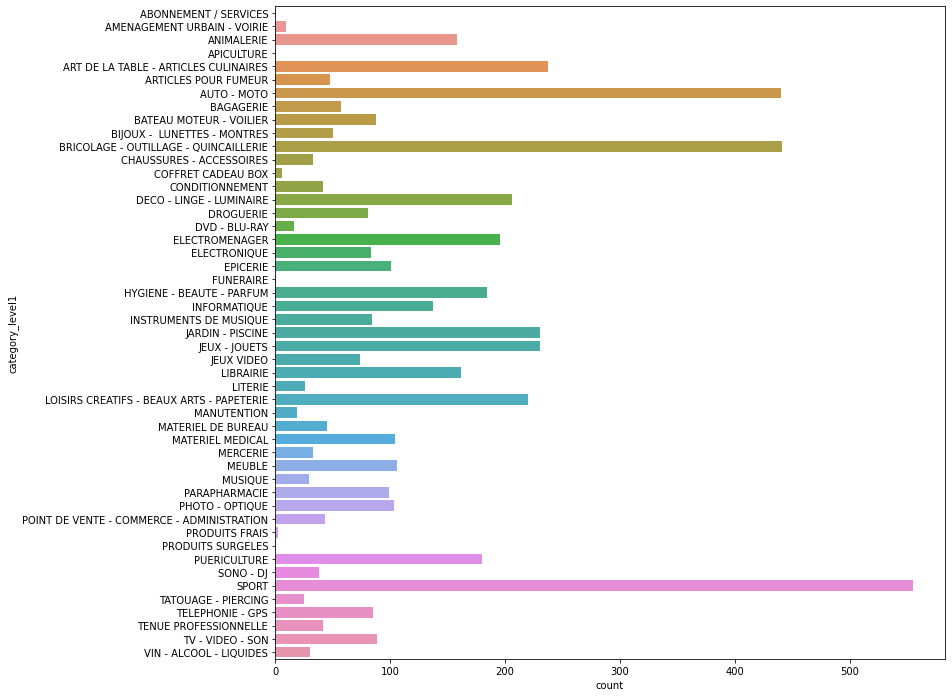

In [ ]:
plt.figure(figsize=(12,12))
_ = sns.countplot(y=CATEGORY_NAMES_DF['category_level1'])

###Observation
* Here we can see that SPORT is most frequent category 
* ABONNEMENT/SERVICES, APICULTURE, PRODUCITS SURGELES, and FUNERAIRE are less frequent only occuring 1 time

###Level 2 catrgories

In [ ]:
# Level 2
cat_level2_counts = CATEGORY_NAMES_DF.groupby('category_level2')['category_level2'].count()
print(cat_level2_counts.describe())
print()
print("Level 2 the most frequent category: ", cat_level2_counts.argmax())
print("Level 2 the less frequent category: ", cat_level2_counts.argmin())

count    483.000000
mean      10.910973
std       13.035315
min        1.000000
25%        4.000000
50%        8.000000
75%       13.000000
max      187.000000
Name: category_level2, dtype: float64

Level 2 the most frequent category:  353
Level 2 the less frequent category:  12


###Obseravtion
* In Level 2 the most frequent category is :  353
* Level 2 the less frequent category is :  12

###Level 3 categories

In [ ]:
cat_level3_counts = CATEGORY_NAMES_DF.groupby('category_level3')['category_level3'].count()
print(cat_level3_counts.describe())
print()
print("Level 3 the most frequent category: ", cat_level3_counts.argmax())

count    5263.000000
mean        1.001330
std         0.036449
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: category_level3, dtype: float64

Level 3 the most frequent category:  1480


In [ ]:
CATEGORY_NAMES_DF[['category_level3']].value_counts()

category_level3                                
FONTAINE A EAU                                     2
VOITURE                                            2
PELUCHE                                            2
CONFORT URINAIRE                                   2
FUSIBLE                                            2
                                                  ..
DESODORISANT AUTO - PARFUM AUTO                    1
DESODORISANT - NETTOYANT A LITIERE                 1
DESINFECTION DES INSTRUMENTS - LAVE-INSTRUMENTS    1
DESINFECTION DENTAIRE                              1
ŒILLETS                                            1
Length: 5263, dtype: int64

###Observation 
* level 3 catogeries is at highest granularity level


#Train_DF(train.bson)

In [ ]:
# lets check sample data format

for c,d in enumerate(TRAIN_DB):
  if c == 1:
        break
  print(d)

{'_id': 0, 'imgs': [{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00\xb4\x00\xb4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\

###First images in train datasets
As it is said in data description page, TRAIN_DB contains a list of 7,069,896 dictionaries, one per product. Each dictionary contains :

* product id (key: _id)
* the category id of the product (key: category_id),
* 1-4 images, stored in a list (key: imgs).


In [ ]:
for item in TRAIN_DB:
    break
print(type(item), list(item.keys()))
print(item['_id'], len(item['imgs']), item['category_id'],)

<class 'dict'> ['_id', 'imgs', 'category_id']
2 1 1000004079


##Images (key: imgs)

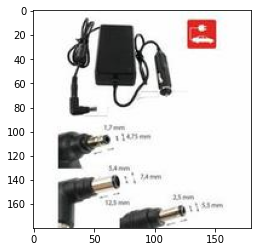

In [ ]:
# https://www.geeksforgeeks.org/python-opencv-imdecode-function/
def decode(data):
    arr = np.asarray(bytearray(data), dtype=np.uint8)
    img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

import io
from PIL import Image

def decode_pil(data):
    return Image.open(io.BytesIO(data))

for img_dict in item['imgs']:
    img = decode(img_dict['picture'])
    plt.figure()
    plt.imshow(img)

In [42]:
# this code is refered from https://www.kaggle.com/code/vfdev5/data-visualization-and-analysis
# Method to compose a single image from 1 - 4 images
def decode_images(item_imgs):
    nx = 2 if len(item_imgs) > 1 else 1
    ny = 2 if len(item_imgs) > 2 else 1
    composed_img = np.zeros((ny * 180, nx * 180, 3), dtype=np.uint8)
    for i, img_dict in enumerate(item_imgs):
        img = decode(img_dict['picture'])
        h, w, _ = img.shape        
        xstart = (i % nx) * 180
        xend = xstart + w
        ystart = (i // nx) * 180
        yend = ystart + h
        composed_img[ystart:yend, xstart:xend] = img
    return composed_img

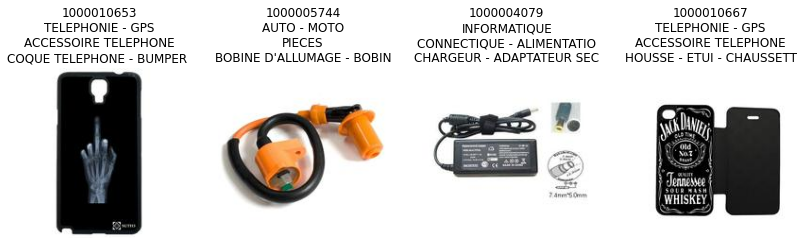

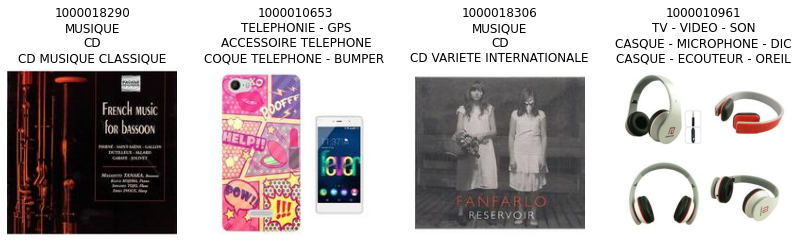

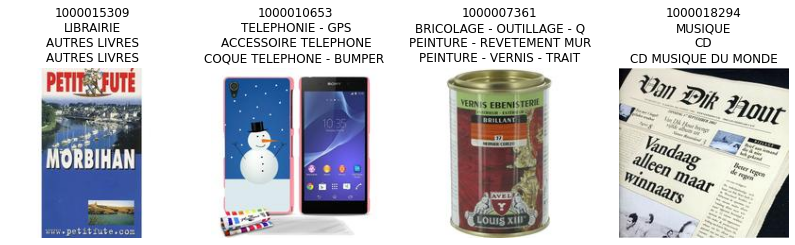

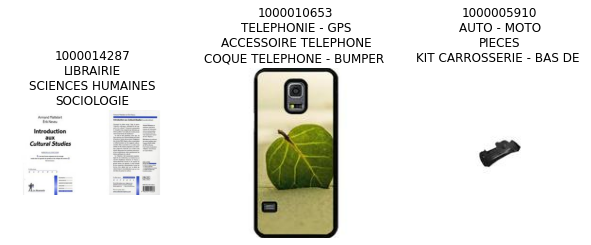

In [ ]:
max_counter = 15
counter = 0
n = 4
for item in TRAIN_DB:    
    if counter % n == 0:
        plt.figure(figsize=(14, 6))
    
    mask = CATEGORY_NAMES_DF['category_id'] == item['category_id']    
    plt.subplot(1, n, counter % n + 1)
    cat_levels = CATEGORY_NAMES_DF[mask][level_tags].values.tolist()[0]
    cat_levels = [c[:25] for c in cat_levels]
    title = str(item['category_id']) + '\n'
    title += '\n'.join(cat_levels)
    plt.title(title)
    plt.imshow(decode_images(item['imgs']))
    plt.axis('off')
    
    counter += 1
    if counter == max_counter:
        break

##Random item access
Let's make a random access to products by maping each product byte offset and length.

Following code creates a dictionary with key indexing item _id and values (offset, length)

In [ ]:
# https://www.kaggle.com/code/vfdev5/random-item-access

import struct
from tqdm import tqdm_notebook

num_dicts = 7069896 # according to data page
length_size = 4
IDS_MAPPING = {}

with open(os.path.join(INPUT_PATH, 'train.bson'), 'rb') as f, tqdm_notebook(total=num_dicts) as bar:
    item_data = []
    offset = 0
    while True:        
        bar.update()
        f.seek(offset)
        
        item_length_bytes = f.read(length_size)     
        if len(item_length_bytes) == 0:
            break                
        # Decode item length:
        length = struct.unpack("<i", item_length_bytes)[0]
        
        f.seek(offset)
        item_data = f.read(length)
        assert len(item_data) == length, "%i vs %i" % (len(item_data), length)
        
        # Check if we can decode
        item = bson.BSON.decode(item_data)
        
        IDS_MAPPING[item['_id']] = (offset, length)        
        offset += length            
            
def get_item(item_id):
    assert item_id in IDS_MAPPING
    with open(os.path.join(INPUT_PATH, 'train.bson'), 'rb') as f:
        offset, length = IDS_MAPPING[item_id]
        f.seek(offset)
        item_data = f.read(length)
        return bson.BSON.decode(item_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


  0%|          | 0/7069896 [00:00<?, ?it/s]

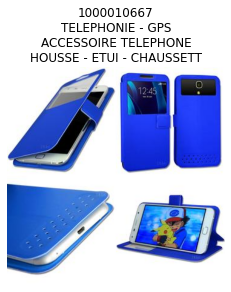

In [ ]:
item = get_item(1234)

mask = CATEGORY_NAMES_DF['category_id'] == item['category_id']    
cat_levels = CATEGORY_NAMES_DF[mask][level_tags].values.tolist()[0]
cat_levels = [c[:25] for c in cat_levels]
title = str(item['category_id']) + '\n'
title += '\n'.join(cat_levels)
plt.title(title)
plt.imshow(decode_images(item['imgs']))
_ = plt.axis('off')

## Product ID (key:_id) and Category ID (key:category_id)

In [ ]:
#creating dataframe of _id and category_id from train.bson
from tqdm import tqdm_notebook

num_dicts = 7069896 # according to data page
prod_to_category = [None] * num_dicts

with tqdm_notebook(total=num_dicts) as bar:        
    TRAIN_DB = bson.decode_file_iter(open(os.path.join(INPUT_PATH, 'train.bson'), 'rb'))

    for i, item in enumerate(TRAIN_DB):
        bar.update()
        prod_to_category[i] = (item['_id'], item['category_id'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


  0%|          | 0/7069896 [00:00<?, ?it/s]

In [ ]:
TRAIN_CATEGORIES_DF = pd.DataFrame(prod_to_category, columns=['_id', 'category_id'])
TRAIN_CATEGORIES_DF.head()

_id  category_id
0    0   1000010653
1    1   1000010653
2    2   1000004079
3    3   1000004141
4    4   1000015539

In [ ]:
print("Unique categories: %i in %i entries" % (len(TRAIN_CATEGORIES_DF['category_id'].unique()), len(TRAIN_CATEGORIES_DF)))

Unique categories: 5270 in 7069896 entries


In [ ]:
# Distribution of categories
 
train_categories_gb = TRAIN_CATEGORIES_DF.groupby('category_id')
train_categories_count = train_categories_gb['category_id'].count()
print(train_categories_count.describe())

count     5270.000000
mean      1341.536243
std       4941.011223
min         12.000000
25%         69.000000
50%        200.000000
75%        718.500000
max      79640.000000
Name: category_id, dtype: float64


In [ ]:
TRAIN_CATEGORIES_DF.head()

_id  category_id
0    0   1000010653
1    1   1000010653
2    2   1000004079
3    3   1000004141
4    4   1000015539

In [ ]:
TRAIN_CATEGORIES_DF.category_id.value_counts()

1000018296    79640
1000011423    71116
1000011427    69784
1000014202    65642
1000015309    65435
              ...  
1000019608       12
1000012168       12
1000017733       12
1000010893       12
1000019484       12
Name: category_id, Length: 5270, dtype: int64

In [ ]:
TRAIN_CATEGORIES_DF.category_id.unique()

array([1000010653, 1000004079, 1000004141, ..., 1000012571, 1000020847,
       1000011375])

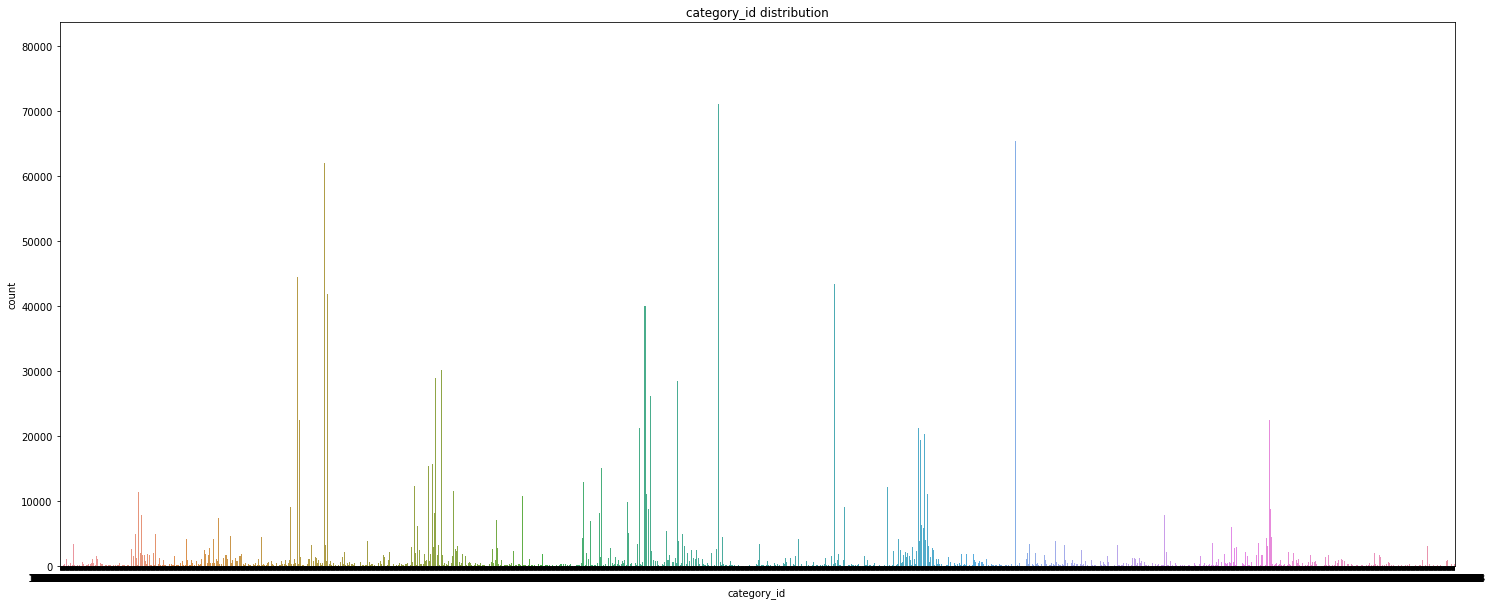

In [ ]:
# count of category_id
fig, ax = plt.subplots(figsize=(25,10))
ax = sns.countplot(x='category_id', data=TRAIN_CATEGORIES_DF).set_title('category_id distribution')


###Obseravtion
* 5270 unique categories in 7069896 entries
* Max is  79640 and Min is 12 
* from count plot we can see that we have imbalanced dataset

In [ ]:
most_freq_cats = train_categories_count[train_categories_count == train_categories_count.max()]
less_freq_cats = train_categories_count[train_categories_count == train_categories_count.min()]

print("Most frequent category: ", CATEGORY_NAMES_DF[CATEGORY_NAMES_DF['category_id'].isin(most_freq_cats.index)].values)
print("Less frequent category: ", CATEGORY_NAMES_DF[CATEGORY_NAMES_DF['category_id'].isin(less_freq_cats.index)].values)

Most frequent category:  [[1000018296 'MUSIQUE' 'CD' 'CD POP ROCK - CD ROCK INDE']]
Less frequent category:  [[1000017266 'APICULTURE' "OUTILS DE L'APICULTEUR"
  'CHASSE-ABEILLES - PIEGE INSECTES - BOUCHON PIEGE']
 [1000022465 'BATEAU MOTEUR - VOILIER' 'ELECTRICITE'
  'CONVERTISSEUR DE TENSION']
 [1000017559 'BATEAU MOTEUR - VOILIER'
  'PIECE MOTEUR DE BATEAU - PIECE MOTEUR DE HORS BORD'
  'ECHAPEMENT - VENTILATION']
 [1000015609 'CHAUSSURES - ACCESSOIRES' 'ACCESSOIRES CHAUSSURES'
  'ESSUIE-BOTTES - LAVE-BOTTES']
 [1000008633 'CONDITIONNEMENT' 'CALAGE - PROTECTION' 'COUSSIN GONFLABLE']
 [1000012168 'DROGUERIE' 'COMBUSTIBLE' 'CHARBON DE BOIS']
 [1000012287 'DROGUERIE' "MATERIEL D'ENTRETIEN" 'PINCE A DECHETS']
 [1000003589 'ELECTROMENAGER' 'ENTRETIEN DES SOLS - MAISON' 'CIREUSE']
 [1000013297 'ELECTRONIQUE' 'CAPTEURS'
  'SYSTEME DE SURVEILLANCE DE NIVEAU']
 [1000000896 'EPICERIE' 'CONSERVE DE LEGUME' 'POIVRON EN CONSERVE']
 [1000016613 'HYGIENE - BEAUTE - PARFUM' 'CAPILLAIRE'
  'PASSE A 

###Observation

* 1 most frequent category (found 79640 times) : MUSIQUE (en.: music)
* 31 less frequent categories (found 12 times) : PUERICULTURE (en.: childcare), APICULTURE (en.: beekeeping), SPORT/BASEBALL/BLOUSON DE BASEBALL - VESTE DE BASEBALL, ...

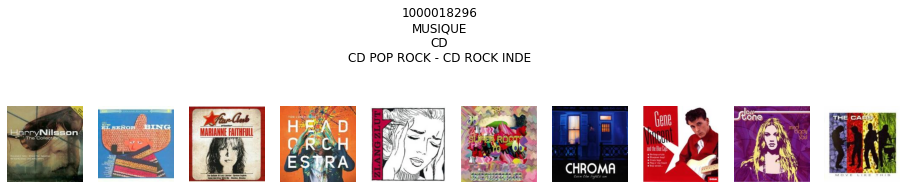

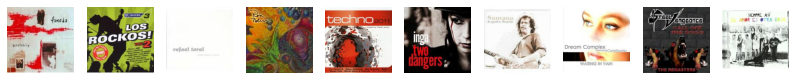

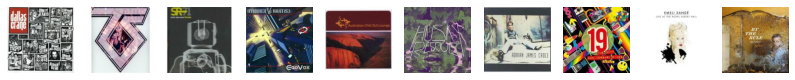

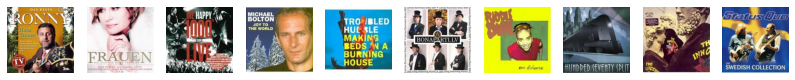

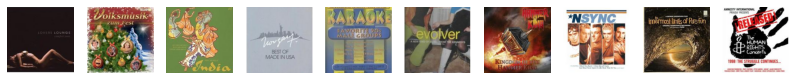

In [ ]:
#display most freq. categories
most_freq_cat = most_freq_cats.index[0]

plt.figure(figsize=(16, 4))
mask = CATEGORY_NAMES_DF['category_id'] == most_freq_cat    
cat_levels = CATEGORY_NAMES_DF[mask][level_tags].values.tolist()[0]
title = str(most_freq_cat) + '\n'
title += '\n'.join(cat_levels)
plt.suptitle(title)

most_freq_cat_ids = train_categories_gb.get_group(most_freq_cat)['_id']
max_counter = 50
counter = 0
n = 10
for item_id in most_freq_cat_ids.values[:max_counter]:    
    if counter > 0 and counter % n == 0:
        plt.figure(figsize=(14, 6))
    
    item = get_item(item_id)
    
    mask = CATEGORY_NAMES_DF['category_id'] == item['category_id']    
    plt.subplot(1, n, counter % n + 1)
    plt.imshow(decode_images(item['imgs']))
    plt.axis('off')
    
    counter += 1
    if counter == max_counter:
        break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


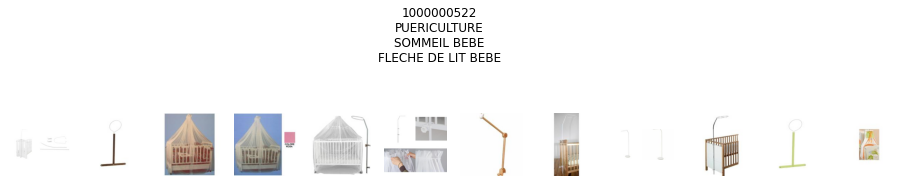

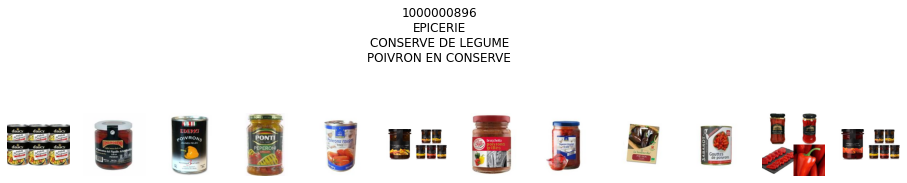

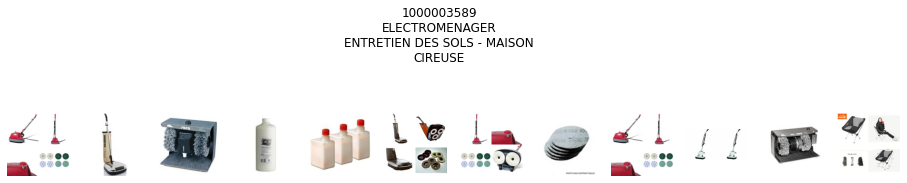

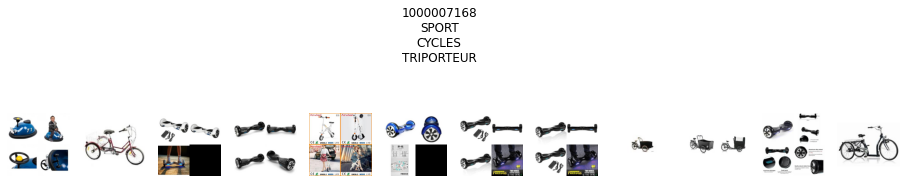

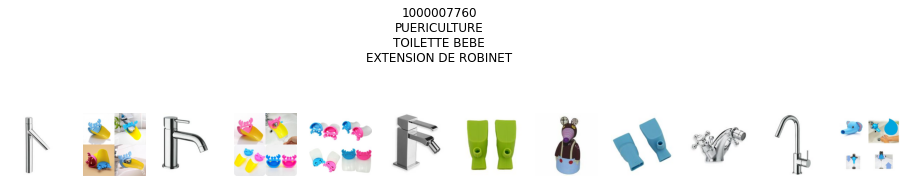

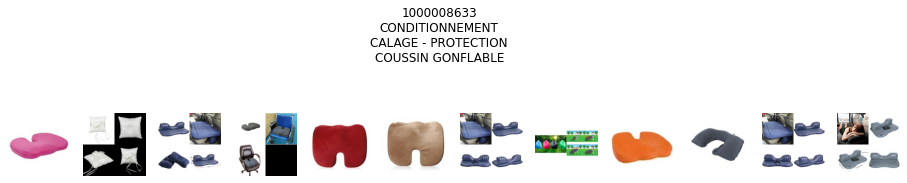

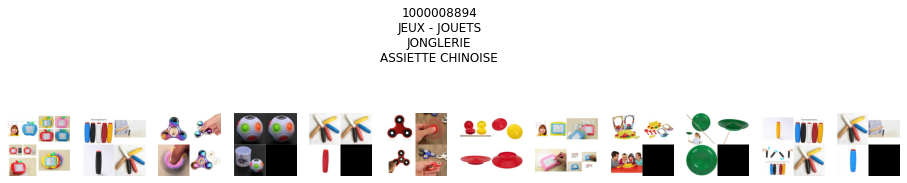

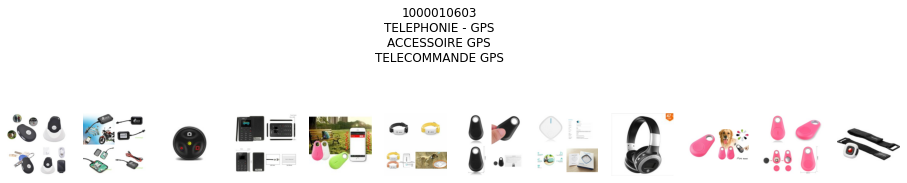

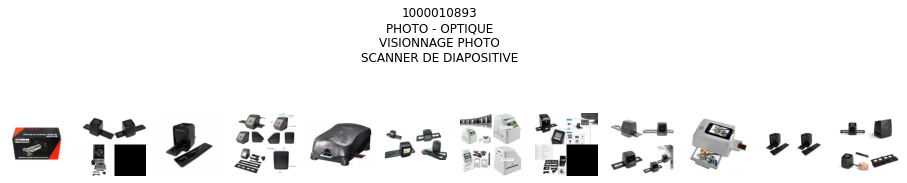

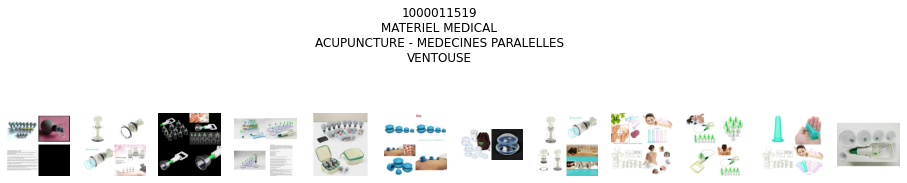

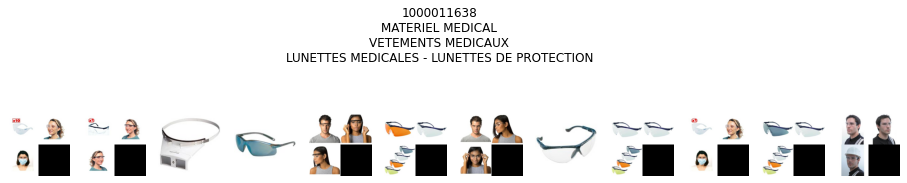

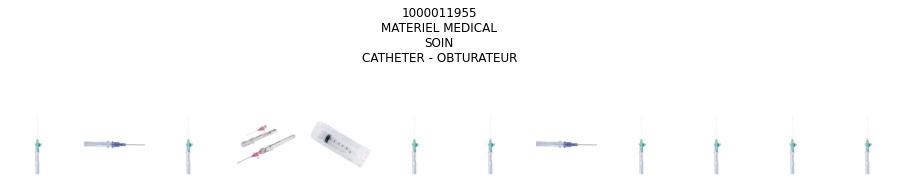

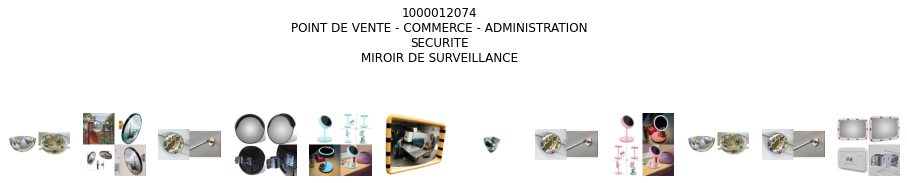

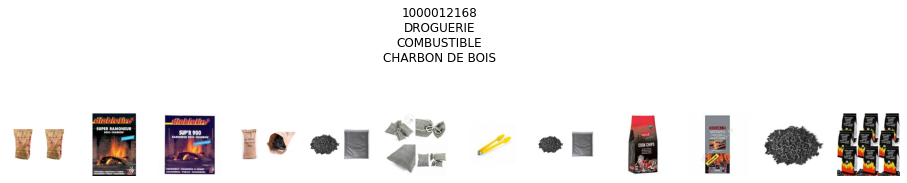

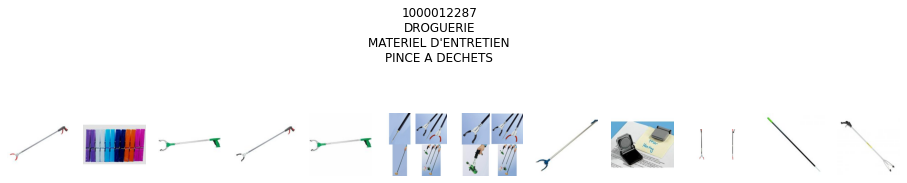

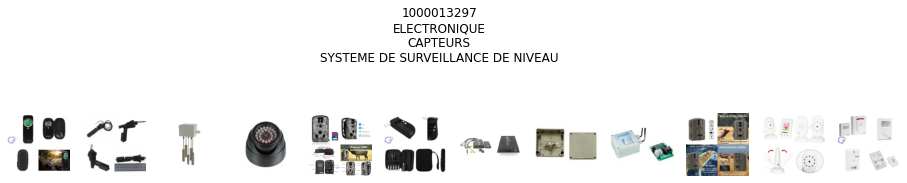

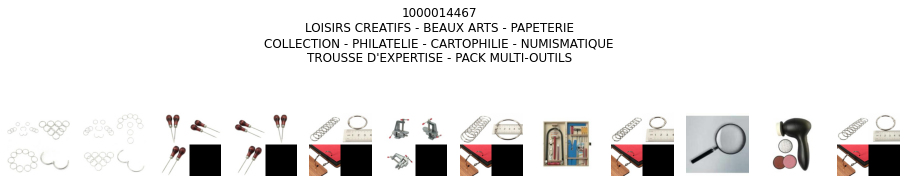

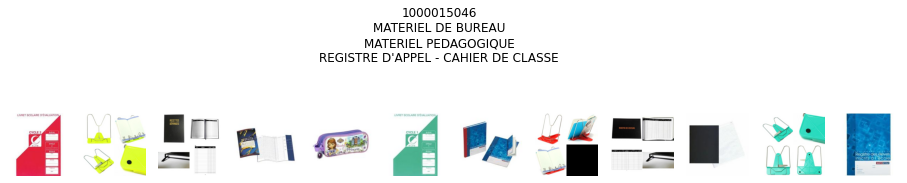

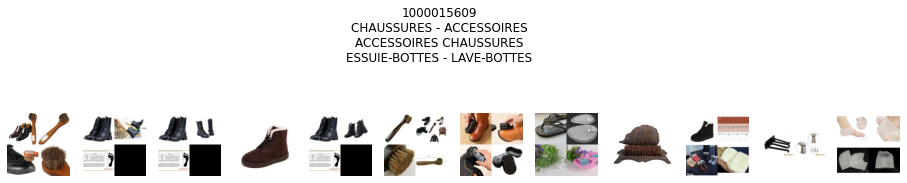

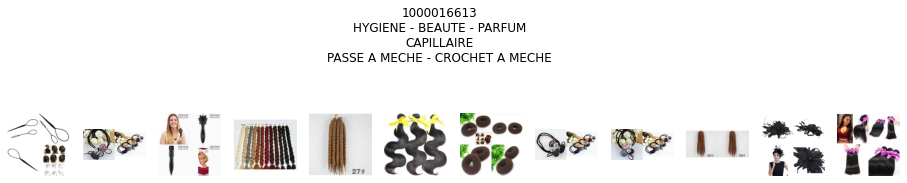

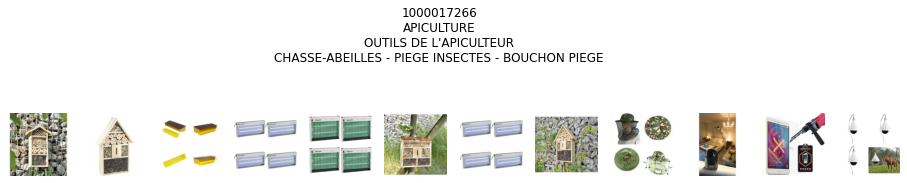

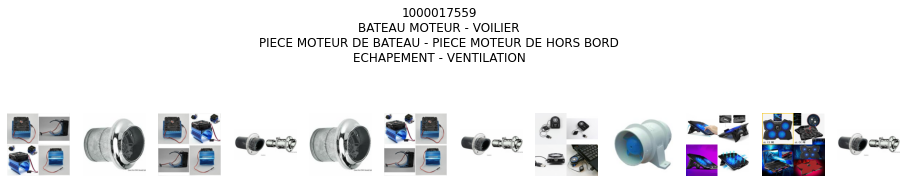

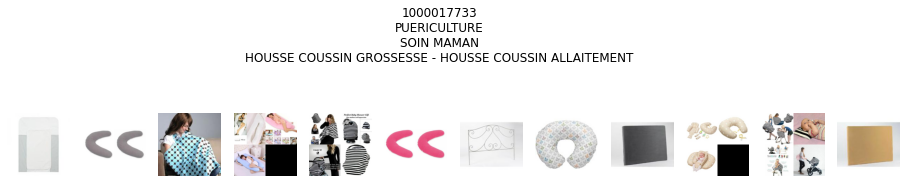

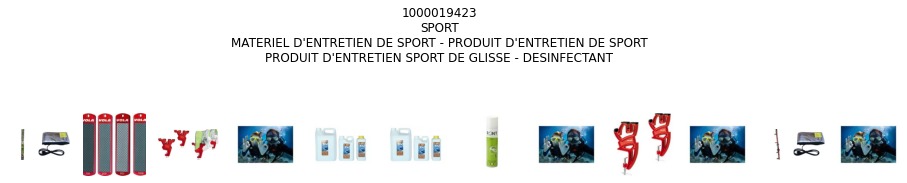

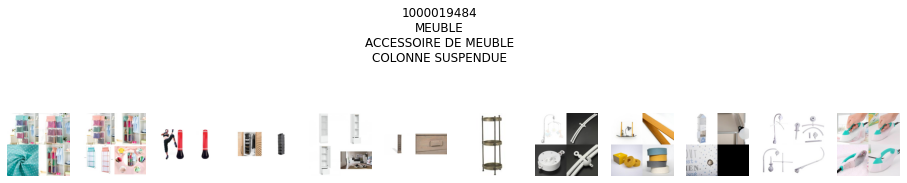

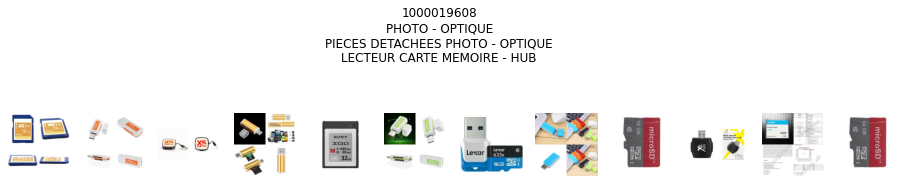

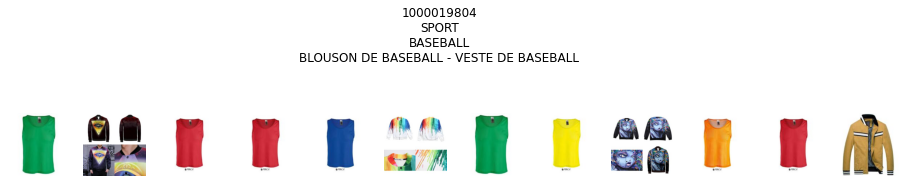

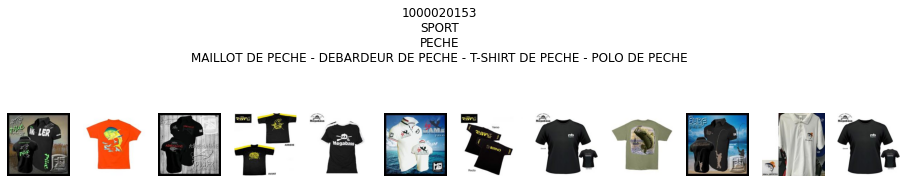

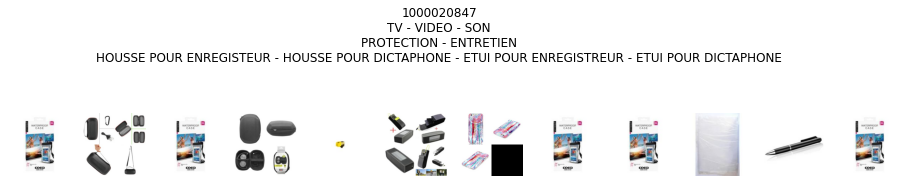

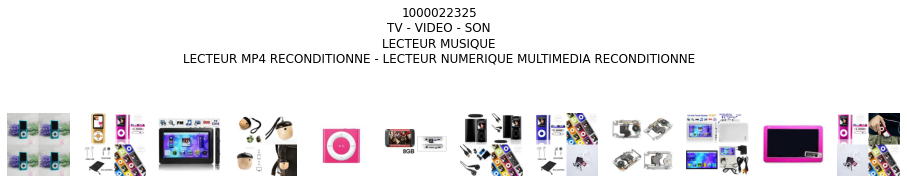

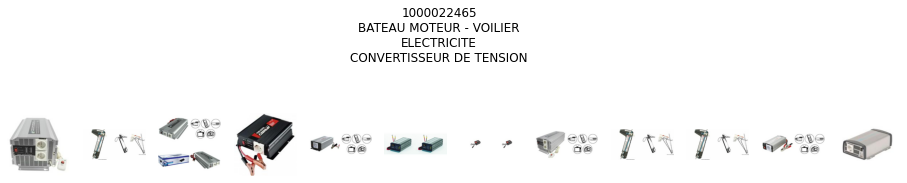

In [ ]:
#display less freq. category
for less_freq_cat in less_freq_cats.index:
    less_freq_cat_ids = train_categories_gb.get_group(less_freq_cat)['_id']
    counter = 0
    n = 12
    
    plt.figure(figsize=(16, 4))
    mask = CATEGORY_NAMES_DF['category_id'] == less_freq_cat    
    cat_levels = CATEGORY_NAMES_DF[mask][level_tags].values.tolist()[0]
    title = str(less_freq_cat) + '\n'
    title += '\n'.join(cat_levels)
    plt.suptitle(title)

    for item_id in less_freq_cat_ids.values:    
        if counter > 0 and counter % n == 0:
            plt.figure(figsize=(16, 4))

        item = get_item(item_id)

        mask = CATEGORY_NAMES_DF['category_id'] == item['category_id']    
        plt.subplot(1, n, counter % n + 1)
        plt.imshow(decode_images(item['imgs']))
        plt.axis('off')

        counter += 1      

##Observations:
* Data set is very large having almost 9 million products
* More than 15 million images at 180x180 resolution
* More than 5000 unique categories.
* This is quite an extreme multi-class classification
* The goal of the competition is to predict category_id by image. We need to predict a number, e.g. 1000010653 by an image.
* this data set is also imbalanced datset most frequent category occurs 79640 times and less frq. category occurs 12 times
* quality of dataset is good no preprocessing is required 
